In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
#Dataset & libraries loaded
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['target'] = diabetes.target
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [46]:
X = df['bmi'].values
Y = df['target'].values
X_train, X_test = X[:-20], X[-20:]
Y_train, Y_test = Y[:-20], Y[-20:]
w = 0
b = 0
iterations = 3000
alpha = 0.5
n = len(Y_train)
loss_history = []
#Paramters set, data splitted

In [47]:
for iteration in range(iterations):
  prediction = (w*X_train)+b
  loss = np.mean((prediction - Y_train)**2)
  loss_history.append(loss)
  dw = 2/n*(np.sum((prediction-Y_train)*X_train))
  db = 2/n*(np.sum((prediction-Y_train)))
  w = w-alpha*dw
  b = b-alpha*db
  if (iteration+1)%50 == 0:
    print(f"Epoch {iteration+1}: MSE = {loss:.2f} || w = {w:.2f} || b = {b:.2f}")
print(f"Final parameters: w = {w:.2f} || b = {b:.2f}")
#Loop for gradient descent and learning

Epoch 50: MSE = 5551.14 || w = 100.62 || b = 153.32
Epoch 100: MSE = 5227.35 || w = 190.39 || b = 153.27
Epoch 150: MSE = 4969.25 || w = 270.54 || b = 153.24
Epoch 200: MSE = 4763.51 || w = 342.09 || b = 153.20
Epoch 250: MSE = 4599.50 || w = 405.98 || b = 153.17
Epoch 300: MSE = 4468.76 || w = 463.03 || b = 153.14
Epoch 350: MSE = 4364.54 || w = 513.96 || b = 153.12
Epoch 400: MSE = 4281.47 || w = 559.43 || b = 153.10
Epoch 450: MSE = 4215.25 || w = 600.02 || b = 153.08
Epoch 500: MSE = 4162.46 || w = 636.27 || b = 153.06
Epoch 550: MSE = 4120.38 || w = 668.63 || b = 153.05
Epoch 600: MSE = 4086.83 || w = 697.53 || b = 153.03
Epoch 650: MSE = 4060.09 || w = 723.33 || b = 153.02
Epoch 700: MSE = 4038.78 || w = 746.36 || b = 153.01
Epoch 750: MSE = 4021.79 || w = 766.92 || b = 153.00
Epoch 800: MSE = 4008.24 || w = 785.28 || b = 152.99
Epoch 850: MSE = 3997.45 || w = 801.67 || b = 152.98
Epoch 900: MSE = 3988.84 || w = 816.31 || b = 152.98
Epoch 950: MSE = 3981.98 || w = 829.38 || b = 1

In [48]:
prediction_test = w*X_test+b
mse = np.mean((Y_test-prediction_test)**2)
print(f"MSE: {mse:.2f}")
#Error evaluation

MSE: 2549.26


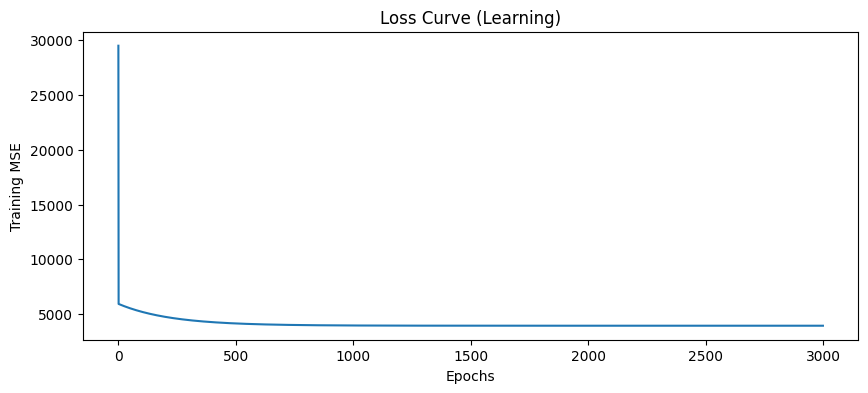

In [49]:
plt.figure(figsize=(10, 4))
plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Training MSE")
plt.title("Loss Curve (Learning)")
plt.show()
#Plot 1 for learning display

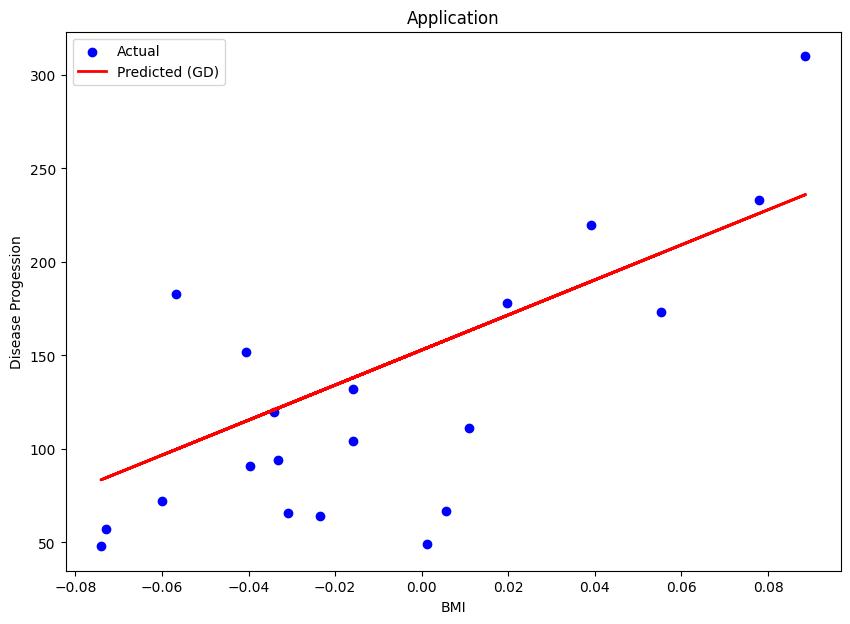

In [50]:
plt.figure(figsize=(10, 7))
plt.title("Application")
plt.scatter(X_test, Y_test, color='blue', label = 'Actual')
plt.plot(X_test, prediction_test, color='red', linewidth=2, label='Predicted (GD)')
plt.ylabel("Disease Progession")
plt.xlabel("BMI")
plt.legend()
plt.show()
#Plot 2 for comparison with ground truth (test set)

In [56]:
#(Optional R^2 loss)
ssres = np.sum((Y_test - prediction_test)**2)
sstot = np.sum((Y_test-np.mean(Y_test))**2)
loss = 1-ssres/sstot
print(f"R^2 loss: {loss:.2f}")

#Results:
print("\nConclusion: The simple linear regression model using BMI explains about 47% of the variance in diabetes disease progression. While BMI is an important factor, additional features could further improve the model’s predictive power.")


R^2 loss: 0.47

Conclusion: The simple linear regression model using BMI explains about 47% of the variance in diabetes disease progression. While BMI is an important factor, additional features could further improve the model’s predictive power.
